# I'm a Little TPOT

In [1]:
import pickle
with open('pickles/dataframes.pickle', 'rb') as f:
    m_dfs = pickle.load(f)

In [4]:
import logging
import numpy as np
logging.getLogger('sklearn').setLevel(logging.ERROR)
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTRegressor
from sklearn.model_selection import ParameterGrid

ms = ['qb', 'rb', 'wr', 'te']
for i in range(len(m_dfs)):
    pos = ms[i]
    print(f"finding model for {pos}\n")
    dataframe = m_dfs[i][0]
    X = dataframe.drop(columns=['player_name', 'points']).values.astype('float32')
    y = dataframe['points'].values.astype('float32')

# generations: How many times the algorithm will repeat the process of creating new models and improving them.
# population_size: How many models are created in each round of the process.
# cv: How many times the data is split to test and train the models. 
    # For example, if cv=5, the data will be split into 5 parts, and the model will be tested 5 times using a different part each time.
# scoring: What the algorithm is trying to minimize or maximize when picking the best model. 
    # In this case, it tries to minimize the error in predictions, using mean absolute error.
# verbosity: Controls how much information is printed during the process. Higher numbers mean more details.
# random_state: A fixed number to make sure the results are the same every time you run the model.
# n_jobs: How many processors to use to speed up the work. -1 means using all of them.
    # param_grid = {
    #     'generations': [3, 5, 10],
    #     'population_size': [20, 50, 100],
    #     'cv': [
    #         RepeatedKFold(n_splits=5, n_repeats=2, random_state=1),
    #         RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #     ],
    # }
    
    param_grid = {
        'generations': [5],
        'population_size': [50],
        'cv': [RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)],
    }
    best_score = np.inf
    best_model = None
    
    for params in ParameterGrid(param_grid):
        model = TPOTRegressor(
            generations=params['generations'],
            population_size=params['population_size'],
            cv=params['cv'],
            scoring='neg_mean_absolute_error',
            verbosity=2,
            random_state=1,
            n_jobs=-1
        )
        model.fit(X, y)
        score = -model.score(X, y)
        if score < best_score:
            best_score = score
            best_model = model

    # Export the best model
    best_model.export(f'./models/tpot_best_model{pos}.py')

finding model for qb



Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -5.588399823734329

Generation 2 - Current best internal CV score: -5.588399823734329

Generation 3 - Current best internal CV score: -5.588399823734329

Generation 4 - Current best internal CV score: -5.558702691432093

Generation 5 - Current best internal CV score: -5.558702691432093

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
finding model for rb



Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4.439883776859836

Generation 2 - Current best internal CV score: -4.439883776859836

Generation 3 - Current best internal CV score: -4.439883776859836

Generation 4 - Current best internal CV score: -4.439883776859836

Generation 5 - Current best internal CV score: -4.439883776859836

Best pipeline: RandomForestRegressor(SelectPercentile(input_matrix, percentile=42), bootstrap=False, max_features=0.1, min_samples_leaf=6, min_samples_split=10, n_estimators=100)
finding model for wr



Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4.755296079172359

Generation 2 - Current best internal CV score: -4.755296079172359

Generation 3 - Current best internal CV score: -4.755296079172359

Generation 4 - Current best internal CV score: -4.755296079172359

Generation 5 - Current best internal CV score: -4.7511662699323045

Best pipeline: RandomForestRegressor(VarianceThreshold(input_matrix, threshold=0.2), bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=9, min_samples_split=6, n_estimators=100)
finding model for te



Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3.6034564290037965

Generation 2 - Current best internal CV score: -3.587663268656108

Generation 3 - Current best internal CV score: -3.5825684545074576

Generation 4 - Current best internal CV score: -3.5825684545074576

Generation 5 - Current best internal CV score: -3.5795428879587745

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.05, min_samples_leaf=16, min_samples_split=2, n_estimators=100)


### Train each posistion on their models

In [3]:
import sys
sys.path.extend(['./models'])
from tpot_best_modelqb import qbmod
from tpot_best_modelrb import rbmod
from tpot_best_modelwr import wrmod
from tpot_best_modelte import temod
import pandas as pd

False
False


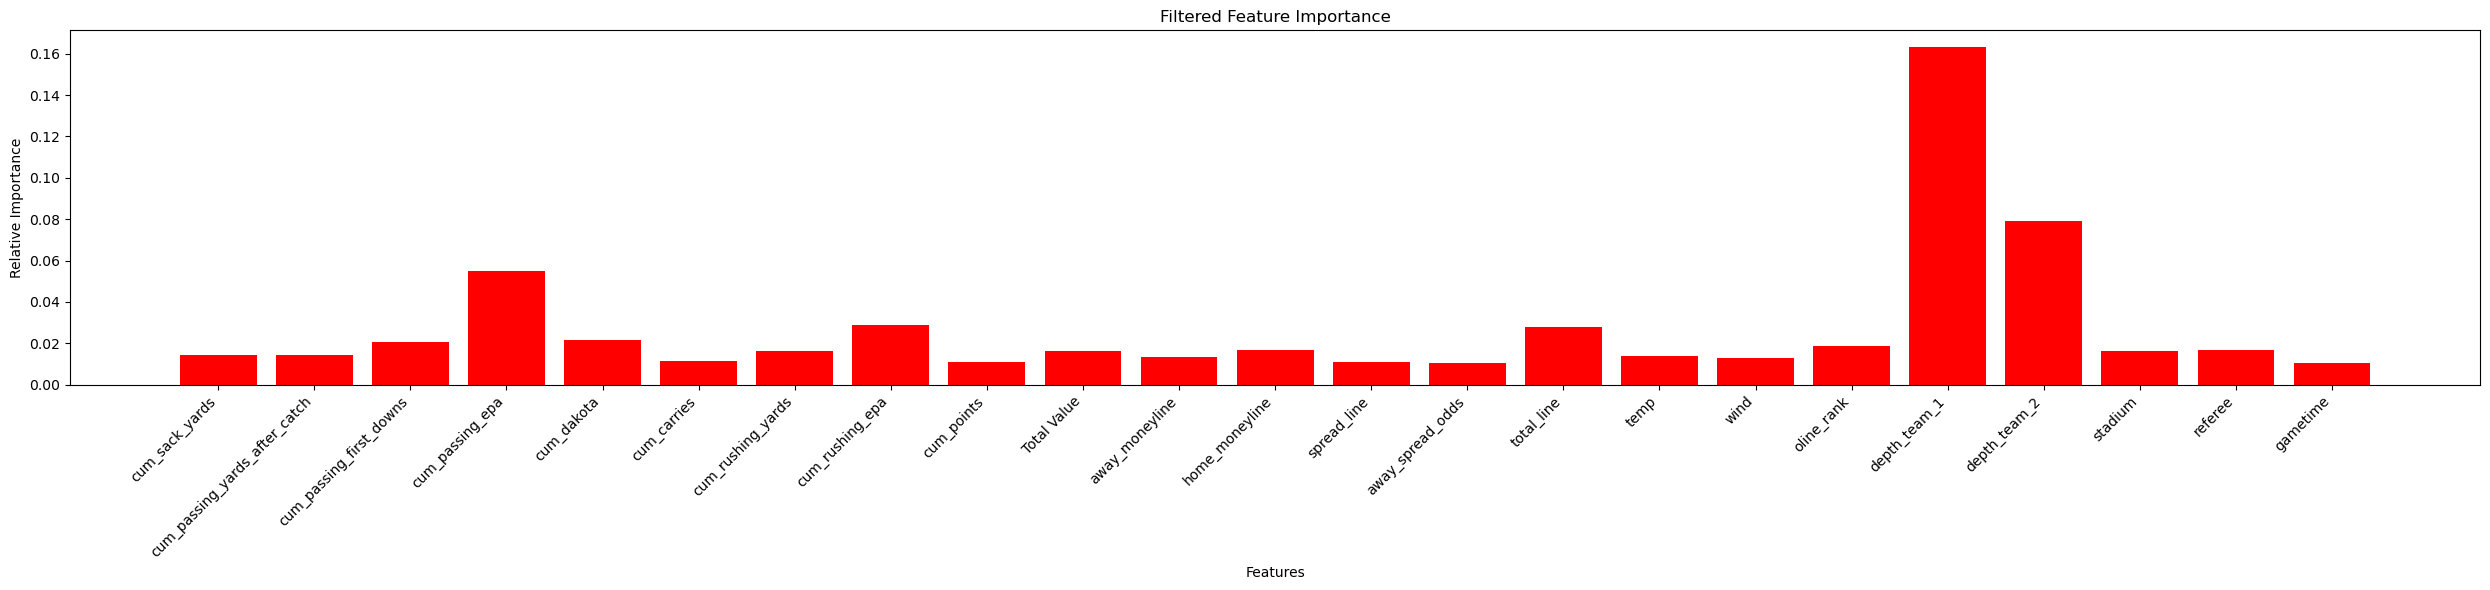

Average difference: 6.170705288529757


In [4]:
qb = qbmod(m_dfs)

In [5]:
qb[(qb['player_name'].isin(['Deshaun Watson', 'Matthew Stafford', 'Brock Purdy', 'Will Levis'])) & (qb['week'] == 1)]

,player_name,week,predicted_points,actual_points
83,Brock Purdy,1,13.308597,10.34
200,Deshaun Watson,1,16.531009,10.66
541,Matthew Stafford,1,16.766236,14.68
685,Will Levis,1,14.653286,6.68


False
False


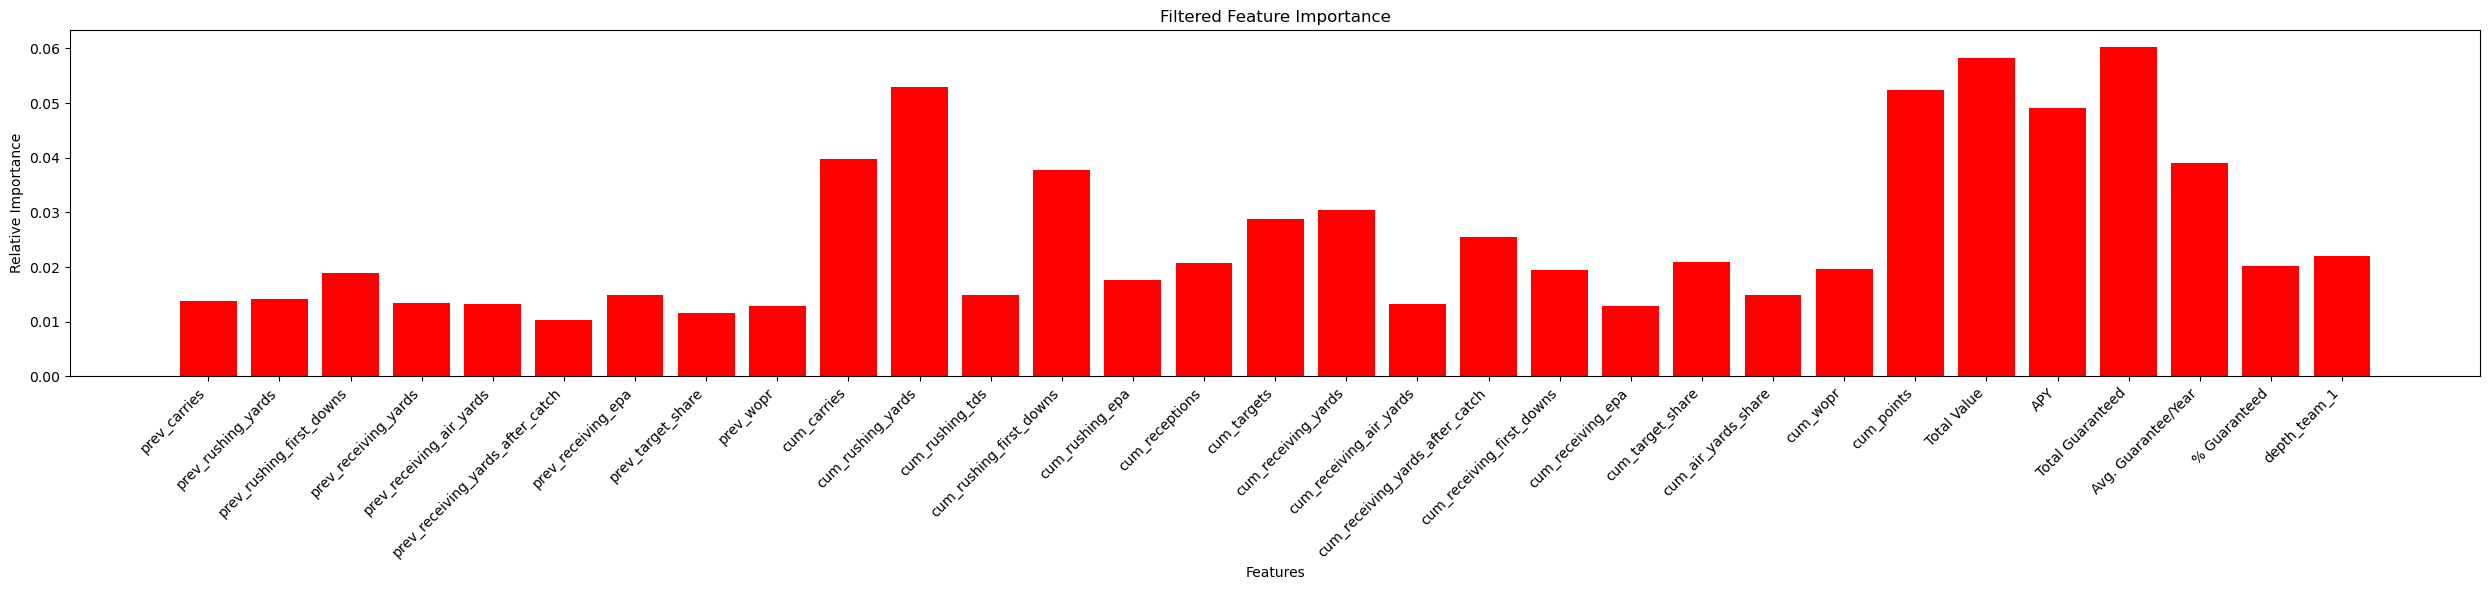

Average difference: 5.292718512540412


In [6]:
rb = rbmod(m_dfs)

In [7]:
rb[(rb['player_name'].isin(['Devin Singletary', 'Jerome Ford', 'Joe Mixon', 'Christian McCaffrey', 'Isaac Guerendo'])) & (rb['week'] == 1)]

,player_name,week,predicted_points,actual_points
282,Christian McCaffrey,1,21.760580,0.000000
453,Devin Singletary,1,12.948420,9.200000
581,Isaac Guerendo,1,4.480486,0.000000
798,Jerome Ford,1,8.057685,18.900000
812,Joe Mixon,1,15.158305,26.799999


False
False


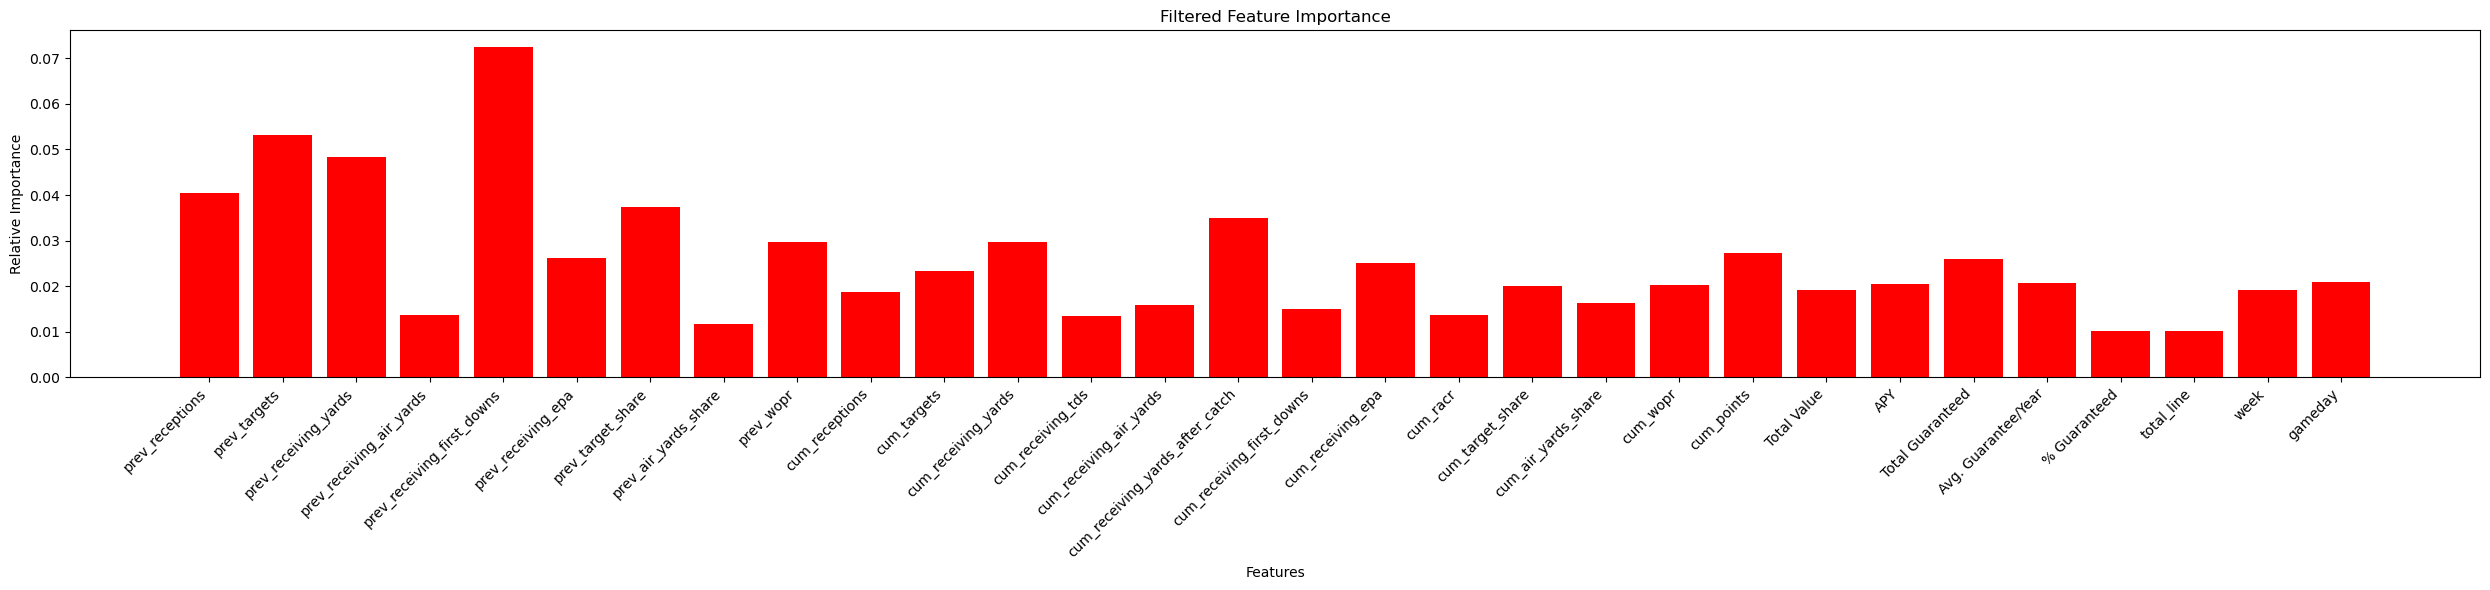

Average difference: 5.123061455963937


In [8]:
wr = wrmod(m_dfs)

In [9]:
wr[(wr['player_name'].isin(['Christian Watson', 'Nico Collins', 'Stefon Diggs', 'Amari Cooper'])) & (wr['week'] == 1)]

,player_name,week,predicted_points,actual_points
82,Amari Cooper,1,15.050046,3.600000
327,Christian Watson,1,6.866824,10.300000
1629,Nico Collins,1,10.755611,17.700001
1867,Stefon Diggs,1,17.965020,21.900000


False
False


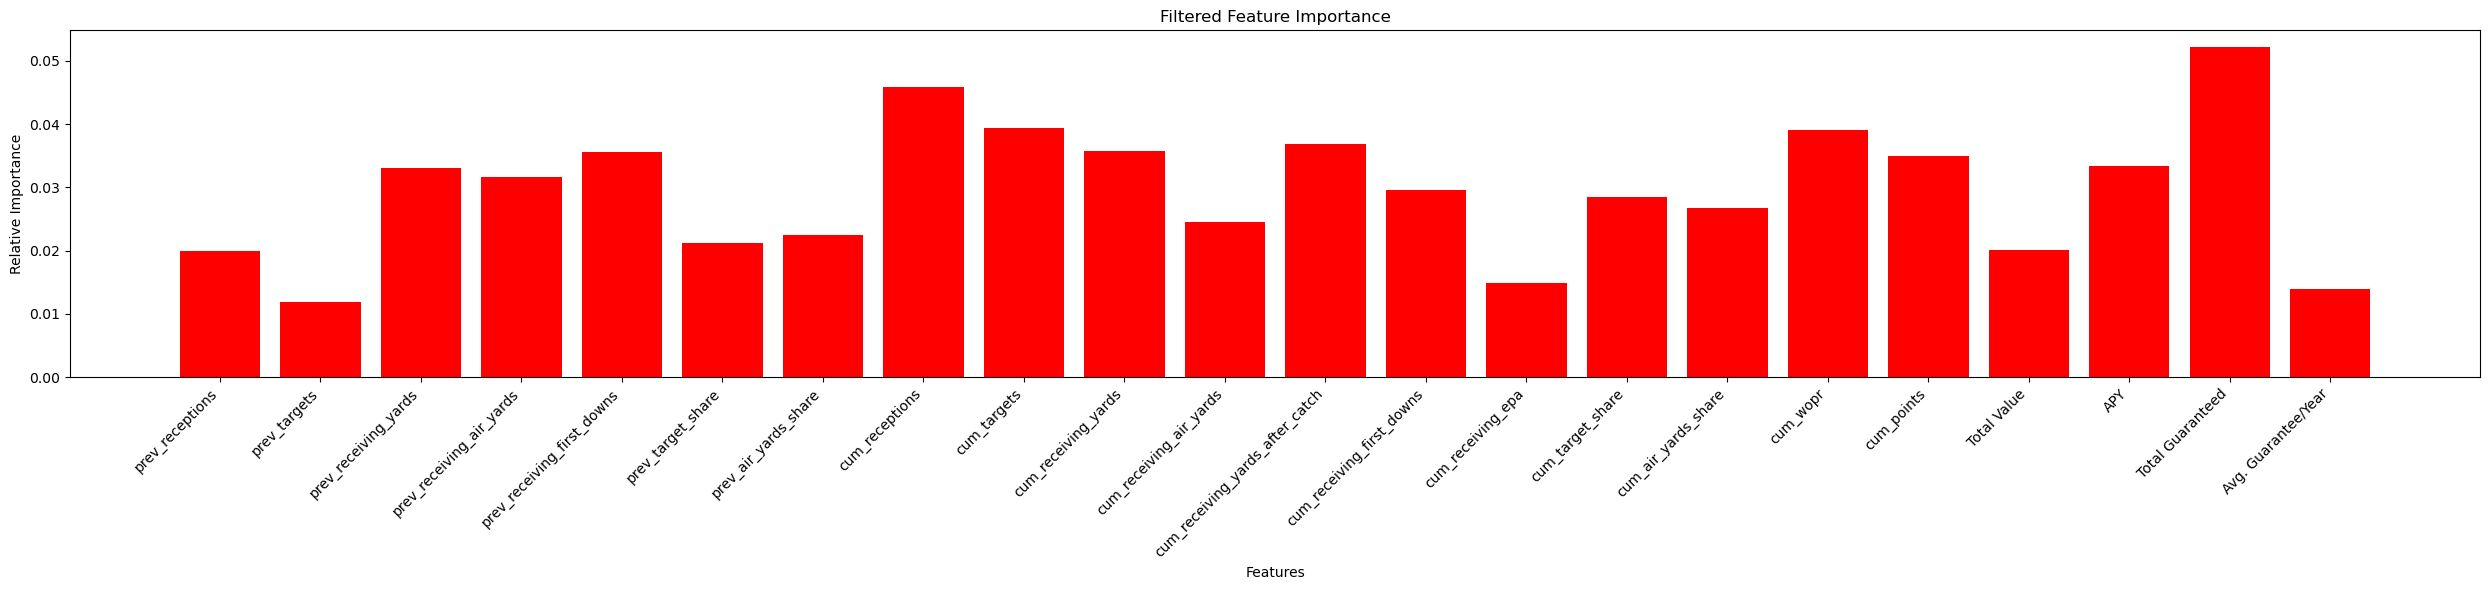

Average difference: 3.9059911806815135


In [10]:
te = temod(m_dfs)

In [11]:
te[(te['player_name'].isin(['Cade Otton', 'Travis Kelce', 'Hunter Henry'])) & (te['week'] == 1)]

,player_name,week,predicted_points,actual_points
124,Cade Otton,1,4.162960,1.5
480,Hunter Henry,1,7.958875,3.8
1010,Travis Kelce,1,11.343413,6.4
